In [138]:
# Import dependencies
import requests
import json
import pandas as pd
from dotenv import load_dotenv, find_dotenv
import os
import time

# Load API Key
load_dotenv(find_dotenv('api.env')) # api.env not included in github. Please make separate env file.
api_key = os.getenv("POLYGON_KEY")

df = pd.DataFrame() # Create Empty Dataframe

base_url = "https://api.polygon.io"
stocksTicker = f"SPY" # SPY = S&P 500 <-- Change this for different stock

for od in range(240318, 240323):
    for strk in range (480, 521):
        odate = str(od)
        strike = str(strk)
        optionsTicker = f"O:{stocksTicker}{odate}C00{strike}000"
        multiplier = 5
        timespan = 'minute' # multiplier + timespan = 5 minutes
        test = f"20{odate[:2]}-{odate[2:4]}-{odate[4:]}"

        query_url = f"{base_url}/v2/aggs/ticker/{optionsTicker}/range/{multiplier}/{timespan}/{test}/{test}?adjusted=true&sort=asc&limit=50000&apiKey={api_key}"
        # Get the response
        response = requests.get(query_url)

        # Retrieve reviews
        reviews = response.json()

        if reviews['resultsCount'] > 0:
            # Convert JSON to Pandas Dataframe
            reviews_df = pd.json_normalize(reviews["results"])
            reviews_df = reviews_df.rename(columns={'v':'Volume', 'vw':'Volume Weighted', 'o':'Open Price', 'c':'Close Price', 'h':'Highest Price', 'l':'Lowest Price', 't':'Timestamp', 'n':'Number of Transaction'})
            reviews_df['Timestamp'] = pd.to_datetime(reviews_df['Timestamp'], unit='ms')
            reviews_df['Stock Name'] = stocksTicker
            reviews_df['Strike'] = strike

            df = pd.concat([df, reviews_df], ignore_index= True, axis = 0)

In [139]:
df

,Volume,Volume Weighted,Open Price,Close Price,Highest Price,Lowest Price,Timestamp,Number of Transaction,Stock Name,Strike
0,1,32.5100,32.51,32.51,32.51,32.51,2024-03-18 17:55:00,1,SPY,481
1,9,29.8600,29.86,29.86,29.86,29.86,2024-03-18 19:55:00,2,SPY,483
2,2,27.7500,27.75,27.75,27.75,27.75,2024-03-18 17:55:00,1,SPY,486
3,8,26.7500,26.75,26.75,26.75,26.75,2024-03-18 17:55:00,1,SPY,487
4,34,24.9100,24.91,24.91,24.91,24.91,2024-03-18 19:55:00,2,SPY,488
...,...,...,...,...,...,...,...,...,...,...
4869,339,1.7970,1.60,1.81,1.89,1.57,2024-03-22 19:35:00,29,SPY,520
4870,177,1.8690,1.84,1.97,2.02,1.75,2024-03-22 19:40:00,37,SPY,520
4871,217,1.9543,1.95,2.02,2.06,1.84,2024-03-22 19:45:00,42,SPY,520
4872,424,2.2132,2.05,2.21,2.34,1.97,2024-03-22 19:50:00,55,SPY,520


<Axes: xlabel='Timestamp'>

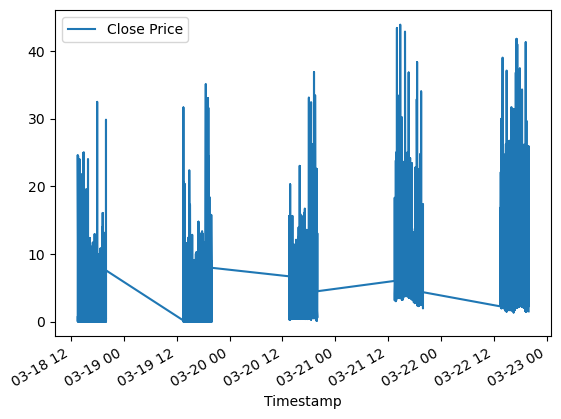

In [142]:
df.plot(kind='line',x='Timestamp', y='Close Price')
# Straight lines = weekends

In [143]:
#Save data to CSV
df.to_csv('../Data/ospy-agg-03-22-03-22.csv', date_format='%Y-%m-%d %H:%M:%S', index=False)
# -------------------------^^^ Change this to stock you chose

In [144]:
# Test CSV Import

df = pd.read_csv('../Data/ospy-agg-03-22-03-22.csv', parse_dates=['Timestamp'])
# ------------------------^^^ Change this to stock you chose
df

,Volume,Volume Weighted,Open Price,Close Price,Highest Price,Lowest Price,Timestamp,Number of Transaction,Stock Name,Strike
0,1,32.5100,32.51,32.51,32.51,32.51,2024-03-18 17:55:00,1,SPY,481
1,9,29.8600,29.86,29.86,29.86,29.86,2024-03-18 19:55:00,2,SPY,483
2,2,27.7500,27.75,27.75,27.75,27.75,2024-03-18 17:55:00,1,SPY,486
3,8,26.7500,26.75,26.75,26.75,26.75,2024-03-18 17:55:00,1,SPY,487
4,34,24.9100,24.91,24.91,24.91,24.91,2024-03-18 19:55:00,2,SPY,488
...,...,...,...,...,...,...,...,...,...,...
4869,339,1.7970,1.60,1.81,1.89,1.57,2024-03-22 19:35:00,29,SPY,520
4870,177,1.8690,1.84,1.97,2.02,1.75,2024-03-22 19:40:00,37,SPY,520
4871,217,1.9543,1.95,2.02,2.06,1.84,2024-03-22 19:45:00,42,SPY,520
4872,424,2.2132,2.05,2.21,2.34,1.97,2024-03-22 19:50:00,55,SPY,520


In [116]:
# Analysis - Checking Max values
print(f"Max values for Volume: {df['Volume'].max()}")
print(f"Max values for Volume Weighted: {df['Volume Weighted'].max()}")
print(f"Max values for Open Price: {df['Open Price'].max()}")
print(f"Max values for Close Price: {df['Close Price'].max()}")
print(f"Max values for Highest Price: {df['Highest Price'].max()}")
print(f"Max values for Lowest Price: {df['Lowest Price'].max()}")
print(f"Max values for Number of Transaction: {df['Number of Transaction'].max()}")

# Looking at the result, standardizing of data will be needed!

Max values for Volume: 20
Max values for Volume Weighted: 22.45
Max values for Open Price: 22.45
Max values for Close Price: 22.45
Max values for Highest Price: 22.45
Max values for Lowest Price: 22.45
Max values for Number of Transaction: 8
